In [0]:
from google.colab import drive
drive.mount('/content/grdive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/grdive


In [0]:
import pandas as pd
import numpy as np

In [0]:
df =pd.read_excel('/content/grdive/My Drive/CFD Machine Learning/CFD.xlsx')

In [0]:
df.head()

,Pressure,Density,Temperature,ccx,ccy,ccz,U1,U2,U3
0,99999.401,1.186296,293.0,-15.66665,-15.66665,0.333333,1.000053,0.000269,0.000074
1,99999.401,1.186296,293.0,-15.00000,-15.66665,0.333333,1.000582,0.000954,0.000260
2,99999.400,1.186296,293.0,-14.33335,-15.66665,0.333333,1.001449,0.001724,0.000427
3,99999.399,1.186296,293.0,-13.66665,-15.66665,0.333333,1.002579,0.002579,0.000593
4,99999.397,1.186296,293.0,-13.00000,-15.66665,0.333333,1.003905,0.003499,0.000760


In [0]:
#df_initial_T =pd.read_csv('/content/grdive/My Drive/CFD Machine Learning/T_initial.csv')
df_initial_p =pd.read_csv('/content/grdive/My Drive/CFD Machine Learning/p_initial.csv',header=None)

In [0]:
df_initial=pd.concat([df_initial_p,df.iloc[:,3:6]],axis=1)

In [0]:
X_initial_p=df_initial.iloc[:,:].values

In [0]:
X_initial_p

array([[ 1.0001800e+05, -1.5666650e+01, -1.5666650e+01,  3.3333344e-01],
       [ 1.0001800e+05, -1.5000000e+01, -1.5666650e+01,  3.3333342e-01],
       [ 1.0001800e+05, -1.4333350e+01, -1.5666650e+01,  3.3333327e-01],
       ...,
       [ 1.0001400e+05,  9.1033065e-01,  3.7229259e+00,  4.0840277e+00],
       [ 1.0001400e+05,  7.4639369e-01,  3.7314290e+00,  4.2502736e+00],
       [ 1.0001400e+05,  9.1046650e-01,  3.8908728e+00,  4.2508689e+00]])

In [0]:
X=df.iloc[:,0:6].values
y=df.iloc[:,6:9].values

In [0]:
y

array([[1.0000533e+00, 2.6937503e-04, 7.4486439e-05],
       [1.0005816e+00, 9.5403627e-04, 2.5980675e-04],
       [1.0014491e+00, 1.7239915e-03, 4.2729743e-04],
       ...,
       [7.9155202e-01, 6.1888720e-02, 5.7029639e-01],
       [8.8504613e-01, 9.9594580e-02, 6.0278036e-01],
       [8.6453104e-01, 7.9454339e-02, 6.0926744e-01]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
R_total=((y_train[:,0]-y_train[:,0].mean())**2).sum()

In [0]:
R_total

58422.12361121986

In [0]:
#NEED TO UNDERSTAND THIS
X_train.shape

(276933, 6)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc_X=StandardScaler()
sc_Y=StandardScaler()

In [0]:
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [0]:
print(X_train)

[[-0.44776334  0.06442739 -0.07550529 -0.36275794 -0.27981779  0.32524377]
 [-0.2446736   0.27983781 -0.26450912 -1.60096065  0.11881527 -0.18277706]
 [-1.22544846  0.09018795 -0.12539994 -0.98185944 -0.91763027  0.83326461]
 ...
 [-2.23842048  0.10939532 -0.14321999 -0.63361495 -1.07708368  0.4381387 ]
 [-0.58645878  0.27114717 -0.25768534 -0.4401457   0.99580834 -0.01343679]
 [ 0.40669961 -5.01727759  5.21512397 -0.95291601  0.21863115 -0.98968343]]


In [0]:
y_train=sc_Y.fit_transform(y_train)
y_test=sc_Y.transform(y_test)

In [0]:
X_initial_p=sc_X.fit_transform(X_initial_p)

In [0]:
((y_train[:,0]-y_train[:,0].mean())**2).sum()

276933.00000000116

In [0]:
#APPLYING PCA
from sklearn.decomposition import PCA

In [0]:
pca=PCA(n_components=2)
X_PCA_train=pca.fit_transform(X_train)
X_PCA_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [0]:
#PCA FOR INITIAL PRESSURE AND X,Y,Z COORDINATES
X_PCA_initial_p=pca.fit_transform(X_initial_p)

In [0]:
print(explained_variance)

[0.36767723 0.23862104]


In [0]:
print(X_PCA_train)

[[ 0.18620521 -0.49879946]
 [ 0.38288899 -1.28582068]
 [ 0.61158722 -1.3122612 ]
 ...
 [ 0.81827745 -1.82315569]
 [ 0.03902127 -0.77416236]
 [ 6.49648289  3.27620864]]


In [0]:
print(X_PCA_test)

[[-0.48536883  0.06663604]
 [-0.77851992  0.55500166]
 [ 0.03151343 -0.84563246]
 ...
 [-1.09648975  1.11463815]
 [-0.95693715  0.71555821]
 [ 0.86002408 -1.61732648]]


In [0]:
pca.components_

array([[-0.3332437 , -0.60840693,  0.60368257, -0.38753819, -0.0073507 ,
        -0.06416482],
       [ 0.62366623, -0.35582274,  0.36816144,  0.57055678,  0.03621706,
         0.1484623 ]])

In [0]:
#Graph of Principal Components vs Pressure
pressure_PCA1=(X_train[:,0])*(X_PCA_train[:,0])
pressure_PCA2=(X_train[:,0])*(X_PCA_train[:,1])

In [0]:
density_PCA1=(X_train[:,1])*(X_PCA_train[:,0])
density_PCA2=(X_train[:,1])*(X_PCA_train[:,1])

temp_PCA1=(X_train[:,2])*(X_PCA_train[:,0])
temp_PCA2=(X_train[:,2])*(X_PCA_train[:,1])

In [0]:
ccx_PCA1=(X_train[:,3])*(X_PCA_train[:,0])
ccx_PCA2=(X_train[:,3])*(X_PCA_train[:,1])

ccy_PCA1=(X_train[:,4])*(X_PCA_train[:,0])
ccy_PCA2=(X_train[:,4])*(X_PCA_train[:,1])

ccz_PCA1=(X_train[:,5])*(X_PCA_train[:,0])
ccz_PCA2=(X_train[:,5])*(X_PCA_train[:,1])

In [0]:
p_initial_PCA1=(X_initial_p[:,0])*(X_PCA_initial_p[:,0])
p_initial_PCA2=(X_initial_p[:,0])*(X_PCA_initial_p[:,1])

ccx_initial_PCA1=(X_initial_p[:,1])*(X_PCA_initial_p[:,0])
ccx_initial_PCA2=(X_initial_p[:,1])*(X_PCA_initial_p[:,1])

ccy_initial_PCA1=(X_initial_p[:,2])*(X_PCA_initial_p[:,0])
ccy_initial_PCA2=(X_initial_p[:,2])*(X_PCA_initial_p[:,1])

ccz_initial_PCA1=(X_initial_p[:,3])*(X_PCA_initial_p[:,0])
ccz_initial_PCA2=(X_initial_p[:,3])*(X_PCA_initial_p[:,1])

In [0]:
len(pressure_PCA2)

276933

In [0]:
import matplotlib.pyplot as plt

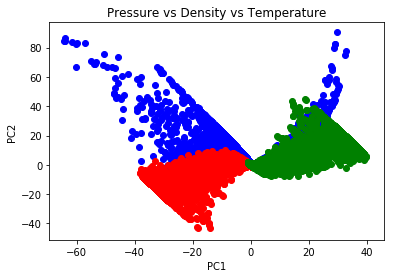

In [0]:
plt.scatter(pressure_PCA1,pressure_PCA2,color='blue')
plt.scatter(density_PCA1,density_PCA2,color='red')
plt.scatter(temp_PCA1,temp_PCA2,color='green')
plt.title("Pressure vs Density vs Temperature")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


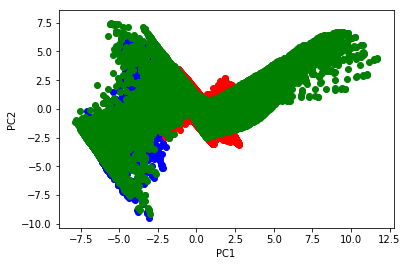

In [0]:
plt.scatter(ccx_PCA1,ccx_PCA2,color='blue')
plt.scatter(ccy_PCA1,ccy_PCA2,color='red')
plt.scatter(ccz_PCA1,ccz_PCA2,color='green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [0]:
max(X_PCA_train[0])
min(X_PCA_train[0])

-0.4987994619942973

In [0]:
min(X_PCA_train[1])

-1.2858206752144044

In [0]:
#PCA VS VELOCITIES
U1_PCA1=(y_train[:,0])*(X_PCA_train[:,0])
U1_PCA2=(y_train[:,0])*(X_PCA_train[:,1])

U2_PCA1=(y_train[:,1])*(X_PCA_train[:,0])
U2_PCA2=(y_train[:,1])*(X_PCA_train[:,1])

U3_PCA1=(y_train[:,2])*(X_PCA_train[:,0])
U3_PCA2=(y_train[:,2])*(X_PCA_train[:,1])


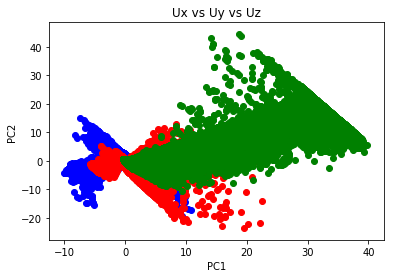

In [0]:
plt.scatter(U1_PCA1,U1_PCA2,color='blue')
plt.scatter(U2_PCA1,U2_PCA2,color='red')
plt.scatter(U3_PCA1,U3_PCA2,color='green')
plt.title('Ux vs Uy vs Uz')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

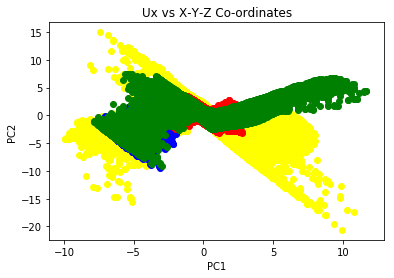

In [0]:
plt.scatter(U1_PCA1,U1_PCA2,color='yellow')
plt.scatter(ccx_PCA1,ccx_PCA2,color='blue')
plt.scatter(ccy_PCA1,ccy_PCA2,color='red')
plt.scatter(ccz_PCA1,ccz_PCA2,color='green')
plt.title('Ux vs X-Y-Z Co-ordinates')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

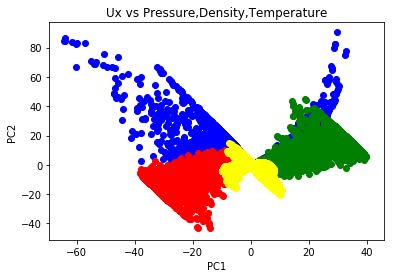

In [0]:

plt.scatter(pressure_PCA1,pressure_PCA2,color='blue')
plt.scatter(density_PCA1,density_PCA2,color='red')
plt.scatter(temp_PCA1,temp_PCA2,color='green')
plt.scatter(U1_PCA1,U1_PCA2,color='yellow')
plt.title('Ux vs Pressure,Density,Temperature')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

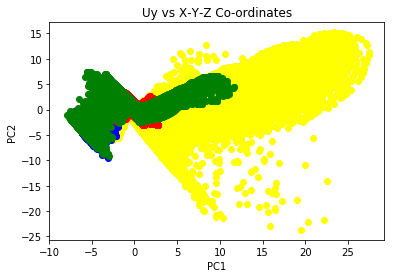

In [0]:
plt.scatter(U2_PCA1,U2_PCA2,color='yellow')
plt.scatter(ccx_PCA1,ccx_PCA2,color='blue')
plt.scatter(ccy_PCA1,ccy_PCA2,color='red')
plt.scatter(ccz_PCA1,ccz_PCA2,color='green')
plt.title('Uy vs X-Y-Z Co-ordinates')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

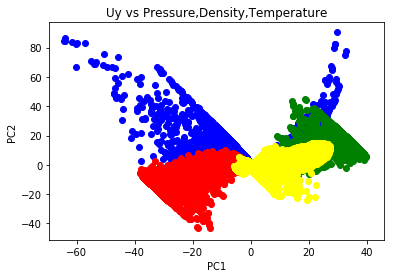

In [0]:

plt.scatter(pressure_PCA1,pressure_PCA2,color='blue')
plt.scatter(density_PCA1,density_PCA2,color='red')
plt.scatter(temp_PCA1,temp_PCA2,color='green')
plt.scatter(U2_PCA1,U2_PCA2,color='yellow')  #vELOCITY ON Y AXIS
plt.title('Uy vs Pressure,Density,Temperature')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

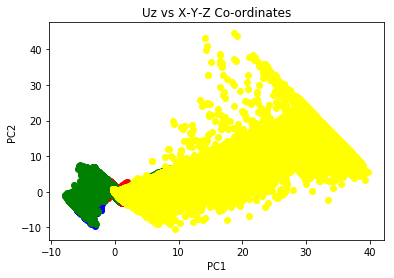

In [0]:

plt.scatter(ccx_PCA1,ccx_PCA2,color='blue') 
plt.scatter(ccy_PCA1,ccy_PCA2,color='red') 
plt.scatter(ccz_PCA1,ccz_PCA2,color='green')
plt.scatter(U3_PCA1,U3_PCA2,color='yellow')
plt.title('Uz vs X-Y-Z Co-ordinates')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#iou 

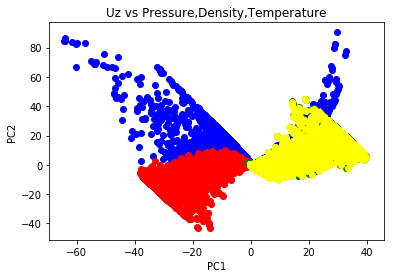

In [0]:

plt.scatter(pressure_PCA1,pressure_PCA2,color='blue')
plt.scatter(density_PCA1,density_PCA2,color='red')
plt.scatter(temp_PCA1,temp_PCA2,color='green')
plt.scatter(U3_PCA1,U3_PCA2,color='yellow')
plt.title('Uz vs Pressure,Density,Temperature')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

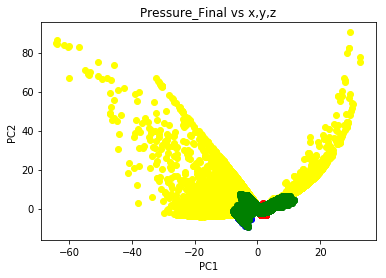

In [0]:

plt.scatter(pressure_PCA1,pressure_PCA2,color='yellow')
plt.scatter(ccx_PCA1,ccx_PCA2,color='blue') 
plt.scatter(ccy_PCA1,ccy_PCA2,color='red') 
plt.scatter(ccz_PCA1,ccz_PCA2,color='green')
plt.title('Pressure_Final vs x,y,z')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

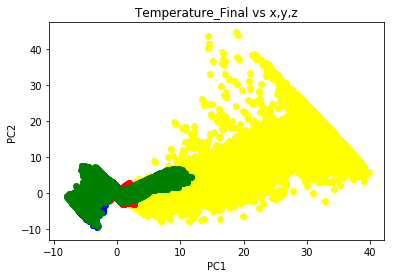

In [0]:
plt.scatter(temp_PCA1,temp_PCA2,color='yellow')
plt.scatter(ccx_PCA1,ccx_PCA2,color='blue') 
plt.scatter(ccy_PCA1,ccy_PCA2,color='red') 
plt.scatter(ccz_PCA1,ccz_PCA2,color='green')

plt.title('Temperature_Final vs x,y,z')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

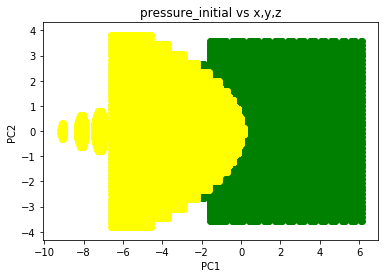

In [0]:
plt.scatter(ccx_initial_PCA1,ccx_initial_PCA2,color='blue') 
plt.scatter(ccy_initial_PCA1,ccy_initial_PCA2,color='red') 
plt.scatter(ccz_initial_PCA1,ccz_initial_PCA2,color='green')
plt.scatter(p_initial_PCA1,p_initial_PCA2,color='yellow')
plt.title('pressure_initial vs x,y,z')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [0]:
                                    #DEEP NEURAL NETWORK

import torch
import torch.nn as nn
import torchvision.datasets as datasets  #import the dataset
import torchvision.transforms as transforms  #
from torch.autograd import Variable  #autograd is a part of pytorch 0.3 but can also be used with pytorch 0.4
from torch.utils.data import Dataset

out_size=3
batch_size=100
learning_rate=0.01

In [0]:
#Retransform dependent variable to original format since we need it for R squared prediction 
y_train=sc_Y.inverse_transform(y_train)   
y_test=sc_Y.inverse_transform(y_test)

#CONVERT TO PYTORCH TENSOR
X_PCA_train=torch.tensor(X_PCA_train)
X_train=torch.tensor(X_train)
y_train=torch.tensor(y_train)



In [0]:
#WHEN WE ARE USING OUR OWN DATASET THEN WE NEED TO CREATE A DATASET CLASS WHICH INHERITS FROM PREDEFINED 
#DATASET CLASS OF torch.utils.data library
class Dataset(Dataset):
  def __init__(self,x,y):
    self.x=x
    self.y=y
  
  def __getitem__(self,index):
    return self.x[index], self.y[index]
  
  def __len__(self):
    return len(self.x)

In [0]:
                            #CONVERT TO PYTORCH VARIABLE FORMAT
X_PCA_train=Variable(X_PCA_train)
X_train=Variable(X_train)
y_train=Variable(y_train)


In [0]:
((y_train[:,0]-y_train[:,0].mean())**2).sum()

tensor(58422.1236, dtype=torch.float64)

In [0]:
print(X_PCA_train.shape,X_PCA_train.dtype)
print(y_train.shape,y_train.dtype)

torch.Size([276933, 2]) torch.float64
torch.Size([276933, 3]) torch.float64


In [0]:
                            #NEURAL NET FOR PCA VARIABLES

In [0]:
dataset=Dataset(X_PCA_train,y_train)

In [0]:
print(dataset.x.shape)
print(dataset.y.shape)

torch.Size([276933, 2])
torch.Size([276933, 3])


In [0]:
((y_train[:,0]-y_train[:,0].mean())**2).sum()

tensor(58422.1236, dtype=torch.float64)

In [0]:
type(dataset)

__main__.Dataset

In [0]:
#MAKE DATA ITERABLE BY LOADING IT TO A LOADER. Shuffe the data to make it independent of order
#Batch size is the number of elements in a batch
train_loader=torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=batch_size,
                                        shuffle=True)

In [0]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [0]:
len(train_loader) #Number of samples/batch size this gives number of batches

2770

In [0]:
print("There is {} batches in the dataset".format(len(train_loader)))
shown=0
for (x,y) in train_loader:
  if shown==1:
    break
  print("For one batch there is:")
  print("Data: {}, Type: {} ".format(x.shape,x.dtype))
  print("Data: {}, Type: {} ".format(y.shape,y.dtype))
  shown+=1
  

There is 2770 batches in the dataset
For one batch there is:
Data: torch.Size([100, 2]), Type: torch.float64 
Data: torch.Size([100, 3]), Type: torch.float64 


In [0]:
#Input of neural net 2 nodes and output of the neural net is 3 nodes
# Neural Net using 3 hidden layers each containing 3 nodes 

input_size=2
hidden_size=3

class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.fc1=torch.nn.Linear(input_size,hidden_size)  
    self.fc2=nn.Linear(hidden_size,hidden_size)    
    self.fc3=nn.Linear(hidden_size,hidden_size)
    self.fc4=nn.Linear(hidden_size,out_size)
    self.hyperbolic_tan=nn.Tanh()                       #Activation function
              
    
    #Input hidden hidden output  =>layer format
  def forward(self,x):
      out=self.fc1(x)   #x-> input size, out->hidden size                        2 input 3 output
      out=self.hyperbolic_tan(out)  # out is passed through hidden layer relu function  3 output through relu
      
      out=self.fc2(out)  #out is given as input to second hidden layer           3 input 3 output
      out=self.hyperbolic_tan(out)
      
      out=self.fc3(out)              #3 input 3 output
      out=self.hyperbolic_tan(out)  
      
      out=self.fc4(out)  # 3 input 3 output
      out=self.hyperbolic_tan(out)
      
      return out           #output from output layer
    

In [0]:
net=Model() #Create an object our class that represents our network
CUDA=torch.cuda.is_available()
if CUDA:  #If GPU is present
  net=net.CUDA()

#The loss function. The cross entropy loss comes along with Softmax in pytorch so dont need to specify softmax explicitly
#For cross entropy loss input should be of shape (N,C) and the labels or output should be of shape (N)
#size_average=True--> The losses are averaged over observations for each mini batch

criterion=torch.nn.MSELoss(size_average=True)   #Loss Criterion
optimizer=torch.optim.Adam(net.parameters(),lr=learning_rate)
#net.parameters() has the tensors corresponding to each of the network layers 

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [0]:
list(net.parameters())

[Parameter containing:
 tensor([[-0.3482,  0.4496],
         [-0.5273, -0.2958],
         [-0.5668,  0.1704]], requires_grad=True), Parameter containing:
 tensor([ 0.2935, -0.2362,  0.2409], requires_grad=True), Parameter containing:
 tensor([[-0.0539, -0.0607, -0.3287],
         [-0.2087, -0.0770,  0.5370],
         [ 0.1673, -0.2230,  0.2926]], requires_grad=True), Parameter containing:
 tensor([ 0.3794, -0.1244,  0.1965], requires_grad=True), Parameter containing:
 tensor([[-0.1806,  0.3789,  0.0610],
         [-0.4258, -0.1743,  0.4936],
         [-0.0894,  0.0860,  0.3846]], requires_grad=True), Parameter containing:
 tensor([-0.4585,  0.4845,  0.3764], requires_grad=True), Parameter containing:
 tensor([[ 0.0412,  0.3354, -0.5660],
         [ 0.4859, -0.4373,  0.5020],
         [ 0.2093, -0.4016,  0.2378]], requires_grad=True), Parameter containing:
 tensor([-0.0555,  0.0932, -0.1407], requires_grad=True)]

In [0]:
net.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (fc4): Linear(in_features=3, out_features=3, bias=True)
  (hyperbolic_tan): Tanh()
)>

In [0]:
R_total=(((y_train[:,0]-y_train[:,0].mean())**2).sum()).item()
print(R_total)

58422.12361121976


In [0]:
#Train Network
count=0
epochs=150
correct_train=0
total_train=0
R_residual=0
AdjRsquared=0 

for epoch in range(epochs):
  for x, y in train_loader:
    count=count+1
    x=Variable(x.float())
    y=Variable(y.float())
   
    if CUDA:
      x=x.cuda()
      y=y.cuda()
    
    outputs=net(x)
    #clear the param_grad in param=param-lr*param_grad, so it wont get accumulated
    optimizer.zero_grad()
    
    loss=criterion(outputs,y)
    loss.backward()
    optimizer.step()
    
    
    R_residual=R_residual+ ((( y[:,0] - outputs[:,0] ) **2 ).sum()).item()
    
    
  
  #print("Residual: {}  Total: {}".format(residual_xaxis, total_xaxis))
  print("EPOCH {} COMPLETED".format(epoch))
  Rsquared=(1-( R_residual/R_total))
  AdjRsquared=(1-(1-(Rsquared)**2))*((100-1)/(100-2-1))  # 2 is the no. of independent feature and 100 is batch size
  print("Training loss: {}  Ux Rsquared accuracy: {}   Ux AdjRsquared accuracy:  {} "
                   .format(loss.item(), Rsquared, AdjRsquared ))
  R_residual=0
  AdjRsquared=0 
     

EPOCH 0 COMPLETED
Training loss: 2.4974889755249023  Ux Rsquared accuracy: 0.36511393712122864   Ux AdjRsquared accuracy:  0.13605680949418844 
EPOCH 1 COMPLETED
Training loss: 1.2189841270446777  Ux Rsquared accuracy: 0.4123883929342582   Ux AdjRsquared accuracy:  0.1735706647016816 
EPOCH 2 COMPLETED
Training loss: 4.106952667236328  Ux Rsquared accuracy: 0.42537067284299557   Ux AdjRsquared accuracy:  0.18467093528015846 
EPOCH 3 COMPLETED
Training loss: 0.6700863242149353  Ux Rsquared accuracy: 0.4709360661919648   Ux AdjRsquared accuracy:  0.22635357799583408 
EPOCH 4 COMPLETED
Training loss: 2.729654312133789  Ux Rsquared accuracy: 0.526933195780454   Ux AdjRsquared accuracy:  0.2833835122548951 
EPOCH 5 COMPLETED
Training loss: 3.580336332321167  Ux Rsquared accuracy: 0.5324843140646837   Ux AdjRsquared accuracy:  0.2893857209048323 
EPOCH 6 COMPLETED
Training loss: 0.4197008013725281  Ux Rsquared accuracy: 0.5335101478936823   Ux AdjRsquared accuracy:  0.2905018011613231 
EPOCH

In [0]:
                          #NN FOR INDEPENDENT VARIABLE

In [0]:
dataset2=Dataset(X_train,y_train)

In [0]:
print(dataset2.x.shape)
print(dataset2.y.shape)

torch.Size([276933, 6])
torch.Size([276933, 3])


In [0]:
#MAKE DATA ITERABLE BY LOADING IT TO A LOADER. Shuffe the data to make it independent of order
#Batch size is the number of elements in a batch
train_loader2=torch.utils.data.DataLoader(dataset=dataset2,
                                        batch_size=batch_size,
                                        shuffle=True)

In [0]:
print("There is {} batches in the dataset".format(len(train_loader2)))
shown=0
for (x,y) in train_loader2:
  if shown==1:
    break
  print("For one batch there is:")
  print("Data: {}, Type: {} ".format(x.shape,x.dtype))
  print("Data: {}, Type: {} ".format(y.shape,y.dtype))
  shown+=1
  

There is 2770 batches in the dataset
For one batch there is:
Data: torch.Size([100, 6]), Type: torch.float64 
Data: torch.Size([100, 3]), Type: torch.float64 


In [0]:
#NN FOR 6 INPUT NODES
#Input of neural net 6 nodes and output of the neural net is 3 nodes
# Neural Net using 3 hidden layers each containing 5 nodes each 
input_size=6
hidden_size=5
class Model2(nn.Module):
  def __init__(self):
    super(Model2,self).__init__()
    self.fc1=torch.nn.Linear(input_size,hidden_size)  
    self.fc2=nn.Linear(hidden_size,hidden_size)    
    self.fc3=nn.Linear(hidden_size,hidden_size)
    self.fc4=nn.Linear(hidden_size,out_size)
    self.hyperbolic_tan=nn.Tanh()                       #Activation function (Hyperbolic with range -1 to 1)
              
    
    #Input hidden hidden output  =>layer format
  def forward(self,x):
      out=self.fc1(x)   #x-> input size, out->hidden size                        2 input 3 output
      out=self.hyperbolic_tan(out)  # out is passed through hidden layer relu function  3 output through relu
      
      out=self.fc2(out)  #out is given as input to second hidden layer           3 input 3 output
      out=self.hyperbolic_tan(out)
      
      out=self.fc3(out)              #3 input 3 output
      out=self.hyperbolic_tan(out)  
      
      out=self.fc4(out)  # 3 input 3 output
      out=self.hyperbolic_tan(out)
      
      return out           #output from output layer
    

In [0]:
net2=Model2() #Create an object our class that represents our network
CUDA=torch.cuda.is_available()
if CUDA:  #If GPU is present
  net2=net2.CUDA()

#The loss function. The cross entropy loss comes along with Softmax in pytorch so dont need to specify softmax explicitly
#For cross entropy loss input should be of shape (N,C) and the labels or output should be of shape (N)
#size_average=True--> The losses are averaged over observations for each mini batch

criterion=torch.nn.MSELoss(size_average=True)   #Loss Criterion
optimizer=torch.optim.Adam(net2.parameters(),lr=learning_rate)
#net2.parameters() has the tensors corresponding to each of the network layers 

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [0]:
list(net2.parameters())

[Parameter containing:
 tensor([[ 0.2663,  0.0648, -0.0913,  0.1342, -0.0147,  0.2187],
         [-0.1691,  0.3958,  0.0246, -0.2349,  0.0258,  0.1797],
         [-0.0522, -0.1370, -0.0774, -0.0810,  0.1708, -0.2275],
         [ 0.4068, -0.3073,  0.1207, -0.2506,  0.2116, -0.2617],
         [ 0.1060,  0.1999, -0.2955, -0.3105, -0.2105,  0.1161]],
        requires_grad=True), Parameter containing:
 tensor([-0.2348,  0.3879,  0.3146,  0.1490, -0.4007], requires_grad=True), Parameter containing:
 tensor([[ 0.1167, -0.3152, -0.1804,  0.1340,  0.3710],
         [-0.4143,  0.2158, -0.3836, -0.2516,  0.2813],
         [ 0.2930,  0.2654, -0.4451, -0.2245,  0.2865],
         [ 0.3103, -0.2729, -0.4125, -0.0022, -0.2394],
         [-0.3501,  0.0029, -0.4068, -0.4169,  0.0304]], requires_grad=True), Parameter containing:
 tensor([-0.2650,  0.0720, -0.1879,  0.0216, -0.3114], requires_grad=True), Parameter containing:
 tensor([[-0.1456,  0.3939,  0.3817,  0.2544,  0.0206],
         [ 0.2249,  0.05

In [0]:
net2.parameters

<bound method Module.parameters of Model2(
  (fc1): Linear(in_features=6, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=5, bias=True)
  (fc4): Linear(in_features=5, out_features=3, bias=True)
  (hyperbolic_tan): Tanh()
)>

In [0]:
#Train Network
count=0
epochs=150
correct_train=0
total_train=0
R_residual=0
AdjRsquared=0 
for epoch in range(epochs):
  for x, y in train_loader2:
    count=count+1
    x=Variable(x.float())
    y=Variable(y.float())
   
    if CUDA:
      x=x.cuda()
      y=y.cuda()
    
    outputs=net2(x)
    #clear the param_grad in param=param-lr*param_grad, so it wont get accumulated
    optimizer.zero_grad()
    
    loss=criterion(outputs,y)
    loss.backward()
    optimizer.step()
    
    
    R_residual=R_residual+ ((( y[:,0] - outputs[:,0] ) **2 ).sum()).item()
    
    
  
  #print("Residual: {}  Total: {}".format(residual_xaxis, total_xaxis))
  print("EPOCH {} COMPLETED".format(epoch))
  Rsquared=(1-( R_residual/R_total))
  AdjRsquared=(1-(1-(Rsquared)**2))*((100-1)/(100-2-1))  # 2 is the no. of independent feature and 100 is batch size
  print("Training loss: {}  Ux Rsquared accuracy: {}   Ux AdjRsquared accuracy:  {} "
                   .format(loss.item(), Rsquared, AdjRsquared ))
  R_residual=0
  AdjRsquared=0 
     

EPOCH 0 COMPLETED
Training loss: 1.2396321296691895  Ux Rsquared accuracy: 0.5968473506185437   Ux AdjRsquared accuracy:  0.3635716415886299 
EPOCH 1 COMPLETED
Training loss: 0.18439292907714844  Ux Rsquared accuracy: 0.686161528840679   Ux AdjRsquared accuracy:  0.48052522394264763 
EPOCH 2 COMPLETED
Training loss: 1.3183859586715698  Ux Rsquared accuracy: 0.7102210594121736   Ux AdjRsquared accuracy:  0.5148142409280667 
EPOCH 3 COMPLETED
Training loss: 0.03517225757241249  Ux Rsquared accuracy: 0.7197896536490285   Ux AdjRsquared accuracy:  0.5287795608713263 
EPOCH 4 COMPLETED
Training loss: 1.6228392124176025  Ux Rsquared accuracy: 0.748880987879426   Ux AdjRsquared accuracy:  0.5723860893476209 
EPOCH 5 COMPLETED
Training loss: 1.1635112762451172  Ux Rsquared accuracy: 0.8300467957999036   Ux AdjRsquared accuracy:  0.7031834086448556 
EPOCH 6 COMPLETED
Training loss: 0.564808189868927  Ux Rsquared accuracy: 0.8649416965860497   Ux AdjRsquared accuracy:  0.763549378462085 
EPOCH 7

In [0]:
y[0].mean()

tensor(0.2664)

In [0]:
Variable(torch.LongTensor(np.array([1,2,3])))

tensor([1, 2, 3])

In [0]:
Variable(torch.zeros((100, 3))).long().shape

torch.Size([100, 3])

In [0]:
10/3

3.3333333333333335

In [0]:
o=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

In [0]:
((o[:,0]-o[:,0].mean())**2).sum()

45.0

In [0]:
o[1:3][1][2]

9

In [0]:
o[:,2]

array([ 3,  6,  9, 12])

In [0]:

#Line JUST for testing purpose
sc= StandardScaler()
l=np.array([[0, 1], [0, 2], [1, 3], [1, 4]])
l=sc.fit_transform(l)
#Line just for testing purpose
print(l)


[[-1.         -1.34164079]
 [-1.         -0.4472136 ]
 [ 1.          0.4472136 ]
 [ 1.          1.34164079]]


In [0]:
(((y_train[:,0]-y_train[:,0].mean())**2).sum()).item()

58422.12361121976